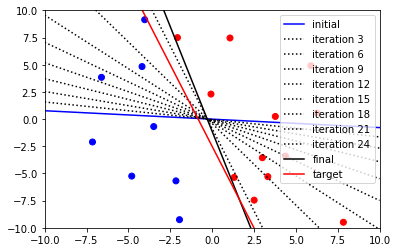

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [ 3.00409519 -4.80078187 -2.06955695 -1.94748415  3.77566496 -6.60866353
  -3.48654992 -4.185433    2.51182565 -0.06687687  3.32968785  6.27925764
  -7.14574508 -4.02635622  4.38258362 -2.16047425  5.90263259  7.84179741
   1.06976639  1.31923732]
 [-3.55387185 -5.24429367  7.49307805 -9.2523093   0.24376786  3.84071774
  -0.68867372  4.83053698 -7.45679998  2.30079583 -5.29220787  0.55695837
  -2.10703967  9.13958916 -3.39510071 -5.68348354  4.91459255 -9.48959941
   7.45950708 -5.36294649]]
[-10  10]


In [4]:
import matplotlib.pyplot as plt 
import numpy as np

#generate y according to input w and x
def test_h(w, x):
    return np.sign(w @ x)

#training data
def training(w_initial, x_training, y_training, x_hypothesis):
    w = w_initial
    n = 0
    misclassified = True
   
    while (misclassified):
        y = test_h(w, x_training)
        
        #plot the initial decision boundary
        if (n == 0):
             plot_h(x_hypothesis, w, "b", label = "initial")
        
        #plot intermediate decision boundaries during iterations of the training
        elif (n%3 == 0):
            label = "iteration " + str(n) 
            plot_h(x_hypothesis, w, 'k:', label = label)
        
        #determining whether there is a misclassified point
        correct = y == y_training
        
        #if there is no misclassified point, return w
        if np.all(correct):
            misclassified = False
            return w 
        else:
            #find a misclassified point and update w
            i = np.argmax(~correct)
            w = w + y_training[i]*x_training[:,i]
        n += 1

#plot graph by determinining slop and constant term based on input x and w
def plot_h(x, w, *plot_args, **plot_kwargs):
    if (w[2] != 0):
        k = -w[1]/w[2]
        l = -w[0]/w[2]
    else:
        k = 0
        l = 0
    y = k*x + l
    plt.plot(x, y, *plot_args, **plot_kwargs)

#set dimension to 2, sample size to 20, range to [-10, 10]
num_dimensions = 2
num_samples = 20
training_range = 10

#create training set x
x_training = np.zeros((num_dimensions+1,num_samples))
x_training[0] = np.ones(num_samples)
for i in range(1, num_dimensions + 1):
    l = np.random.uniform(-training_range, training_range, num_samples)
    x_training[i] = l
#print(x_training)

#create target and initial norm of the decision boundary
w_target = np.array([5, 6, 2])
w_initial = np.array([1, 10, 129])

#create training set y
y_training = test_h(w_target, x_training)
#plot points on the graph. If y > 0, the point is red. Otherwise, the point is blue
x_coordinates = x_training[1, :]
y_coordinates = x_training[2, :]
colors = ["r" if y > 0 else "b" for y in y_training]
plt.scatter(x_coordinates, y_coordinates, c = colors)

x_hypothesis = np.array([-training_range, training_range])

#the final norm for the decision boundary
w_final = training(w_initial, x_training, y_training, x_hypothesis)
#plot the final and target decision boundaries
plot_h(x_hypothesis, w_final, 'k', label = 'final')
plot_h(x_hypothesis, w_target, 'r', label = 'target')

plt.legend()
plt.xlim(-training_range, training_range)
plt.ylim(-training_range, training_range)
plt.show()
print(x_training)
print(x_hypothesis)